In [2]:
%pylab inline
from PIL import Image
ImagenTotal = np.asarray(Image.open('RST/OlivoTotal.png'))
ImagenTemplate = np.asarray(Image.open('RST/OlivoTemplate_large.png'))


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


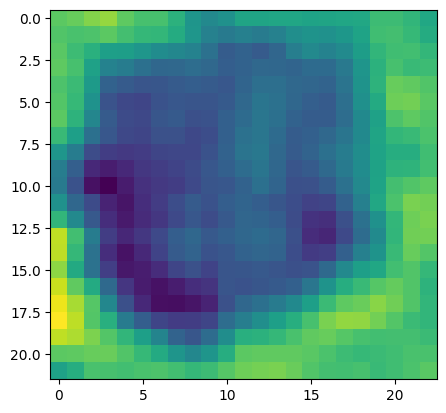

In [3]:
imagen = ImagenTotal[:,:,1]
arbol = ImagenTemplate[:,:,1]
imshow(arbol)

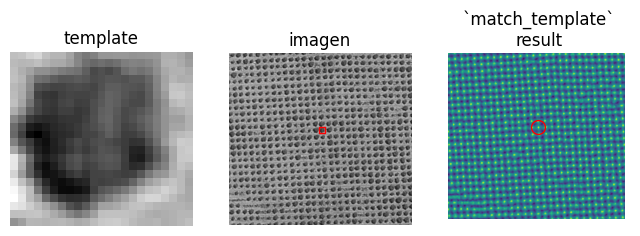

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template

result = match_template(imagen, arbol)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box')
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2, adjustable='box')


ax1.imshow(arbol, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(imagen, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('imagen')
harbol, warbol = arbol.shape
rect = plt.Rectangle((x, y), warbol, harbol, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

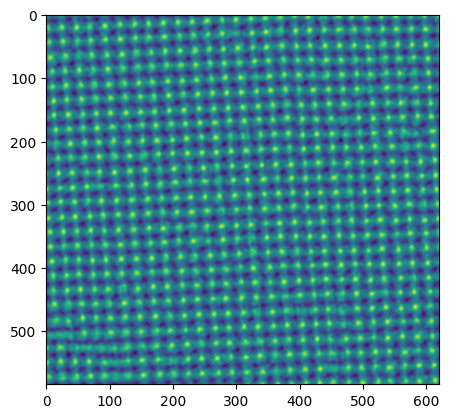

<Figure size 1000x1000 with 0 Axes>

In [5]:
#closer look of the match template
imshow(result);
figure(figsize = (10,10));

In [6]:
#filter results to match similar trees
resultadosfiltrados = np.where(result>0.25)
resultadomaximo = np.where(result>0.99)

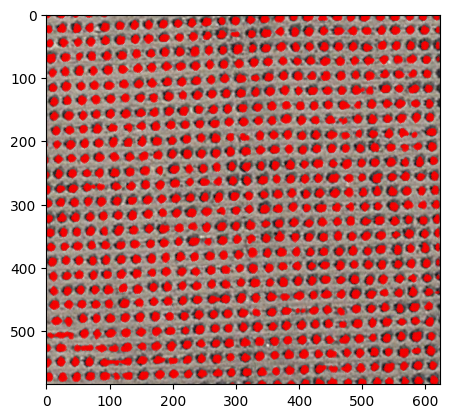

In [8]:
for punto in range(shape(resultadosfiltrados)[1]):
    plot(resultadosfiltrados[1][punto], resultadosfiltrados[0][punto], 'o', 
         markeredgecolor='r', markerfacecolor='none', markersize=0.2)

imshow(ImagenTotal[10:-10,10:-10,:])
figsize(10,10)

plt.savefig("C:/Users/beckt/Downloads/11111/Rst/output/00.png", dpi=300, bbox_inches='tight')

(329652, 711)

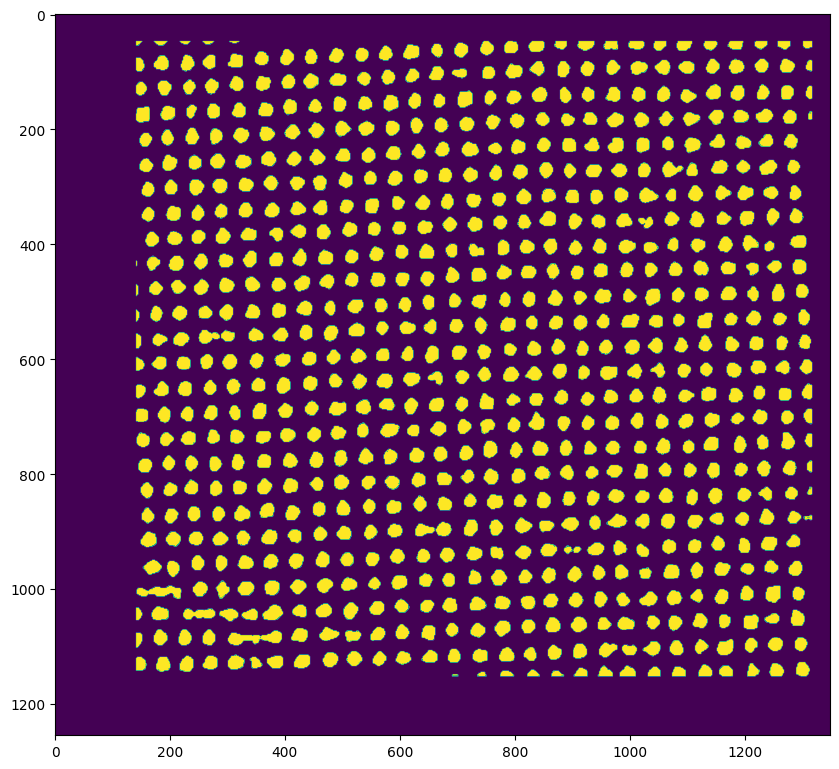

In [9]:
from PIL import Image
import numpy as np
import cv2

# Load the image
image_path = 'RST/output/00.png'
image = Image.open(image_path)
image_np = np.array(image)

# Convert to HSV color space
hsv_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2HSV)


# Define range for red color and create a mask
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])

mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
full_mask = mask1 + mask2

# Count the red points
red_points_count = np.sum(full_mask > 0)

# We can also use connected components to count distinct red points
num_labels, labels_im = cv2.connectedComponents(full_mask)
imshow(full_mask)
red_points_count, num_labels - 1  # Subtract 1 for the background label
